# Introduction to scikit learn 1 (sklearn)

This notebook demonstrates some of the most usefull functions of the beautiful Scikit-Learn library.

What its going to cover:

In [244]:
# let's listify the contents
what_were_covering = [
    "0. An end-to-end Scikit-Learn workflow",
    "1. Getting the data ready",
    "2. Choose the right estimator/algorithm for the pronlems",
    "3. Fit the model/algo and use it to make predictions on our data",
    "4. Evaluating a model",
    "5. Improve a model",
    "6. Save and load a trained model",
    "7. Putting it all together!"]
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for the pronlems',
 '3. Fit the model/algo and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

In [245]:
# Standard imports
import numpy as np
import pandas as pb
import matplotlib.pyplot as plt

## 0. An end-to-end Scikit-Learn workflow

In [246]:
# 1. Get the data ready
import numpy as np
import pandas as pd
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [247]:
# Create X (features matrix)
x = heart_disease.drop("target", axis=1)

# Create Y (labels)
y = heart_disease["target"]

In [248]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [249]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [250]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2
206,59,1,0,110,239,0,0,142,1,1.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3
261,52,1,0,112,230,0,1,160,0,0.0,2,1,2
172,58,1,1,120,284,0,0,160,0,1.8,1,0,2


In [251]:
y_train

144    1
202    0
294    0
157    1
206    0
      ..
14     1
288    0
261    0
172    0
52     1
Name: target, Length: 242, dtype: int64

In [252]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
232,55,1,0,160,289,0,0,145,1,0.8,1,1,3
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2
278,58,0,1,136,319,1,0,152,0,0.0,2,2,2
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
135,49,0,0,130,269,0,1,163,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
63,41,1,1,135,203,0,1,132,0,0.0,1,0,1
115,37,0,2,120,215,0,1,170,0,0.0,2,0,2
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2


In [253]:
y_test

232    0
59     1
278    0
229    0
135    1
      ..
71     1
63     1
115    1
18     1
267    0
Name: target, Length: 61, dtype: int64

In [254]:
clf.fit(x_train, y_train);

In [255]:
# Make a prediction
y_label = clf.predict(np.array([0, 2, 3, 4]))

/home/ksohail/miniconda3/envs/T1Env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
x_test.shape, x_train.shape

In [ ]:
y_preds = clf.predict(x_test)
y_preds

In [ ]:
y_test

In [ ]:
# 4. Evaluate the model
clf.score(x_train, y_train)

In [ ]:
clf.score(x_test, y_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

In [ ]:
confusion_matrix(y_test, y_preds)

In [ ]:
accuracy_score(y_test, y_preds)

In [ ]:
# 5.Improve a model
# Try different amount of n_estimators 
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test) * 100:.2f}%")
    print(" ")

In [ ]:
# 6. Save a model and load it
import pickle

clf = RandomForestClassifier(50).fit(x_train, y_train)
pickle.dump(clf, open("../models/random_forst_model_1.pkl", "wb"))

In [256]:
loaded_model = pickle.load(open("../models/random_forst_model_1.pkl", "rb"))
loaded_model.score(x_test, y_test)

0.9672131147540983

In [257]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [258]:
# 7. Putting it all together!
Heart_disease = pd.read_csv("../data/heart-disease.csv")
np.random.seed(42)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

X = Heart_disease.drop("target", axis=1)
Y = Heart_disease["target"]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.3)

clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

import pickle
pickle.dump(clf, open("../models/random_forst_model_1_7.pkl", "wb"))

Loaded_model = pickle.load(open("../models/random_forst_model_1_7.pkl", "rb"))
Loaded_model.score(X_test, Y_test)

0.8403755868544601

## 1. getting our data ready to be used with ML

Three main things we have to do:
    1. Split the data into features and labels (usually `X` & `Y`)
    2. converting non-numerical values to numerical values (also called feature encoding)
    

In [259]:
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [260]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [261]:
Y = heart_disease["target"]
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [262]:
# split the data into trainig and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.2)

In [263]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [264]:
X.shape, Y.shape

((303, 13), (303,))

In [265]:
X.shape[0] * 0.8, X.shape[0] * 0.2

(242.4, 60.6)

In [266]:
242 + 61 == len(heart_disease)

True

# 1.1 Make sure it's all numerical

In [267]:
car_sales = pd.read_csv("../data/car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [268]:
len(car_sales)

1000

In [269]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [270]:
# Split the data into X and Y
X = car_sales.drop("Price", axis=1)
Y = car_sales["Price"]

# Split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.2)

In [271]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

ValueError: could not convert string to float: 'Toyota'

In [ ]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

In [272]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [273]:
pd.DataFrame(transformed_X)

,0
0,<Compressed Sparse Row sparse matrix of dtype ...
1,<Compressed Sparse Row sparse matrix of dtype ...
2,<Compressed Sparse Row sparse matrix of dtype ...
3,<Compressed Sparse Row sparse matrix of dtype ...
4,<Compressed Sparse Row sparse matrix of dtype ...
...,...
945,<Compressed Sparse Row sparse matrix of dtype ...
946,<Compressed Sparse Row sparse matrix of dtype ...
947,<Compressed Sparse Row sparse matrix of dtype ...
948,<Compressed Sparse Row sparse matrix of dtype ...


In [274]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [275]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [276]:
# Let's refit the model
np.random.seed(42)

X_train, X_test, Y_train, Y_test = train_test_split(transformed_X,
                                                    Y,
                                                    test_size=0.2)

model.fit(X_train, Y_train)
model.score(X_test, Y_test)

ValueError: Found input variables with inconsistent numbers of samples: [950, 1000]

### 1.2 What if theere werre missing values?

1. Fill  the with some values (also known as imputation).
2. Remove the samples with missing data altogether.

In [ ]:
car_sales_missing = pd.read_csv("../data/car-sales-extended-missing-data.csv")
car_sales_missing

In [ ]:
car_sales_missing.dtypes

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
# Create X & Y
X = car_sales_missing.drop("Price", axis=1)
Y = car_sales_missing["Price"]

In [ ]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
transformed_X = transformer.fit_transform(X)


X_train, X_test, Y_train, Y_test = train_test_split(transformed_X,
                                                    Y,
                                                    test_size=0.2)

model.fit(X_train, Y_train)
model.score(X_test, Y_test)

### Option 1: Fill missing data with pandas

In [277]:
# Fill the "Make" column
car_sales_missing["Make"] = car_sales_missing["Make"].fillna("missing")

# Fill the "Colour" column
car_sales_missing["Colour"] = car_sales_missing["Colour"].fillna("missing")

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"] = car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean())

# Fill the "Doors" column
car_sales_missing["Doors"] = car_sales_missing["Doors"].fillna(4)

car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [278]:
# Remove rows with missin Price value
car_sales_missing.dropna(inplace=True)
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [279]:
len(car_sales_missing)

950

In [280]:
# ReCreate X & Y
X = car_sales_missing.drop("Price", axis=1)
Y = car_sales_missing["Price"]

In [281]:
X.shape, 

((950, 4),)

In [282]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 15)>

In [283]:
np.random.seed(42)

X_train, X_test, Y_train, Y_test = train_test_split(transformed_X,
                                                    Y,
                                                    test_size=0.2)

model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.21990196728583944

### Option 2: Fill missing value with Scikit-Learn

In [284]:
car_sales_missing = pd.read_csv("../data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [285]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [286]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [287]:
# Split int X & Y
X = car_sales_missing.drop("Price", axis=1)
Y = car_sales_missing["Price"]
X.isna().sum(), Y.isna().sum()

(Make             47
 Colour           46
 Odometer (KM)    48
 Doors            47
 dtype: int64,
 0)

In [288]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' && numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [289]:
car_sales_filled = pd.DataFrame(filled_X,
                                columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [290]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [291]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 15)>

In [292]:
# Now we've got our data as numbers and filled (no missing data)
# Let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(transformed_X,
                                                    Y,
                                                    test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.21990196728583944

In [293]:
len(car_sales_filled), len(car_sales)

(950, 1000)

In [294]:
what_were_covering[2]

'2. Choose the right estimator/algorithm for the pronlems'

## 2. Chossing the right estimator/algorithm for your problem

some things to note:

* sklearn refers to machine learning models, algorithms as estimators.
* Classification problem - predicting a category (heart disease or not)
  * Sometimes you'll see `clf` (short for classifier) used as a classification estimator
* Regression problem - predicting a number (selling price of a car)

If you know what kind of problem you're working with, one of the next places you should look at is the [Scikit-Learn algorithm cheatsheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).
<img src="../images/sklearn-ml-map.png" width=1500/>

### 2.1 Picking a machine learning model for a regress problem

let's use the California Housing dataset

In [295]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [296]:
housing_df = pd.DataFrame(housing["data"],
                          columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [297]:
housing_df["target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


# my solution

In [298]:
housing_df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [299]:
housing_df.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
target        float64
dtype: object

In [300]:
X = housing_df.drop("target", axis=1)
Y = housing_df["target"]

In [301]:
model = RandomForestRegressor()

X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.2)
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.8102785325575549

# Daniel solution

In [302]:
# import algorithm/estimator
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn import svm

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
Y = housing_df["target"] # median house price in $100,000s

# Split int train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
# model = HistGradientBoostingClassifier()
# model = linear_model.Lasso()
# model = svm.SVR(kernel="linear")
# model = svm.SVR(kernel="rbf")
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.5758549611440125

What if the `Ridge` didn't work or the score didn't fit our needs

well, we could always try a different model...

how about we try ensemble model (an ensemble is comdination of smaller models to try and make better predictions than just a single model)?

Sklearn's ensemble models can be found here: https://scikit-learn.org/stable/modules/ensemble.html

In [303]:
# Import the RandomForestRegressor model class from the ensemeble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
Y = housing_df["target"]

# Split int train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Create random forest model
model = RandomForestRegressor()
model.fit(X_train, Y_train)

# check the score of the model (on the test set)
model.score(X_test, Y_test)

0.8066196804802649

## 2.2 Picking a machine learning model for a classification problem

In [304]:
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [305]:
len(heart_disease)

303

Consulting the map and it says to try `LinearSVC`

In [306]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

# split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC()
clf.fit(X_train, Y_train)

# Evaluate the LinearSVC
clf.score(X_test, Y_test)

0.8688524590163934

In [307]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [308]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

# split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier()

# fit the model to the data
clf.fit(X_train, Y_train)

# Evaluate the RandomForestClassifier
clf.score(X_test, Y_test)

0.8524590163934426

Tidbit:

    1. If you have structured data, use ensemble methods
    2. If you have unstructured data, use deep learning or transfer learning

In [309]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [310]:
what_were_covering[3]

'3. Fit the model/algo and use it to make predictions on our data'

## 3. Fit the model/algorithm on our data and use it to make predictions on our data

### 3.1 Fitting the model to the data

Different names for:
* `x` = features, features variables, data
* `y` = labels, target, target variable

In [311]:
# fit the model to the data
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [312]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [313]:
Y_train.head()

132    1
202    0
196    0
75     1
176    0
Name: target, dtype: int64

### Random Forest model deep dive

For this notebook, we're focused on structured data, which is why the Random Forest has been our model of choice.

#### If you'd like to learn more about the Random Forest and why it's the war horse of machine learning, check out these resources:
* [Random Forest Wikipedia](https://en.wikipedia.org/wiki/Random_forest)
* [Random Forests in Python](http://blog.yhat.com/posts/random-forests-in-python.html) by yhat
* [An Implementation and Explanation of the Random Forest in Python](https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76) by Will Koehrsen

# 3.2 make predictions using machine a learning model

2 ways to make predicitons:
   1. `predict()`
   2. `predict_proba`

In [314]:
# Use a trained model to make predicitions
clf.predict(np.array([1, 7, 8, 3, 4])) # this doesn't work...

/home/ksohail/miniconda3/envs/T1Env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
clf.predict(X_test)

In [ ]:
np.array(Y_test)

In [ ]:
# compare predictions to truth labels to evaluate the model
Y_preds = clf.predict(X_test)
np.mean(Y_preds == Y_test)

In [ ]:
clf.score(X_test, Y_test)

In [ ]:
clf.predict(X_test) == np.array(Y_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_preds)

In [315]:
clf.predict(X_train) == np.array(Y_train)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

Make prediction with `predict_proba()`

In [316]:
# predict_proba returns probabilities of a classification label
clf.predict_proba(X_test[:5])

array([[0.87, 0.13],
       [0.4 , 0.6 ],
       [0.4 , 0.6 ],
       [0.92, 0.08],
       [0.21, 0.79]])

In [317]:
# Let's predict() on the same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [318]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [319]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

# make predictions on a Regressor model (me)

In [320]:
# Import the RandomForestRegressor model class from the ensemeble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
Y = housing_df["target"]

# Split int train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Create random forest model
model = RandomForestRegressor()
model.fit(X_train, Y_train)

# check the score of the model (on the test set)
model.score(X_test, Y_test)

0.8066196804802649

In [321]:
model.predict(X_test)

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [322]:
Y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [323]:
model.predict(X_test) == np.array(Y_test)

array([False, False, False, ..., False, False, False])

# make predictions on a Regressor model (Daniel)

`predict` can also be used for regression models

In [324]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [325]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop("target", axis=1)
y = housing_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestRegressor()

model.fit(x_train, y_train)

# Make predictions
y_preds = model.predict(x_test)

In [326]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54029  , 2.33176  , 1.6549701,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [327]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [328]:
# Comper the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_preds, y_test)

0.3265721842781009

In [329]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

In [330]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for the pronlems',
 '3. Fit the model/algo and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

In [331]:
what_were_covering[4]

'4. Evaluating a model'

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:

* 1. Estimator's built-in `score()` method
* 2. The `scoring` parameter
* 3. Problem-specific metric function

you can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with the `score` method

In [332]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = RandomForestClassifier().fit(x_train, y_train)

In [333]:
# The highest value for .score() method is 1.0, the lowest is 0.0
clf.score(x_train, y_train)

1.0

In [334]:
clf.score(x_test, y_test)

0.8524590163934426

Let's use the `score()` on our regression problem...

In [335]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop("target", axis=1)
y = housing_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100).fit(x_train, y_train)

In [336]:
# The default score() evaluation metric is r_squared for regression algorithms
# Highest = 1.0, Lowest = 0.0
model.score(x_train, y_train)

0.9736828565983116

In [337]:
model.score(x_test, y_test)

0.8066196804802649

### 4.2 Evaluating a model using the `score` parameter

In [338]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = RandomForestClassifier().fit(x_train, y_train)

In [339]:
np.random.seed(42)
cross_val_score(clf, x, y, cv=5)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [340]:
cross_val_score(clf, x, y, cv=5)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

In [341]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(x_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, x, y, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [342]:
# Scoring parameter set to None by default
np.random.seed(42)
cross_val_score(clf, x, y, cv=5, scoring=None)    # Default scoring parameter of classifier = mean accuarcy
                                                  # = clf.score()

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

<img src='../images/sklearn-cross-validation.png' width=600/>

### 4.2.1 Classification model evaluation metrics
 * 1. Accuracy
 * 2. Area under ROC curve
 * 3. Confusion matrix
 * 4. Classification report

**Accuracy**

In [343]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [344]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, x, y)

In [345]:
np.mean(cross_val_score)

0.8215300546448088

In [346]:
print(f"Hear Disease Classifier cross-validated-Accuracy: {np.mean(cross_val_score) *100:.2f}%")

Hear Disease Classifier cross-validated-Accuracy: 82.15%


**Area under the receiver operating characteristic curve (AUC/ROK)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true postive rate (tpr) versus a models false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1


In [347]:
# Import cross_val_score from the model_selection module
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.8241758241758241

In [348]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = clf.predict_proba(x_test)

# Keep the probabilites of the positive class only
y_probs_positive = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.02439024,
       0.02439024, 0.04878049, 0.04878049, 0.04878049, 0.04878049,
       0.04878049, 0.07317073, 0.09756098, 0.09756098, 0.09756098,
       0.14634146, 0.17073171, 0.17073171, 0.19512195, 0.19512195,
       0.2195122 , 0.2195122 , 0.24390244, 0.24390244, 0.26829268,
       0.26829268, 0.34146341, 0.3902439 , 0.3902439 , 0.43902439,
       0.51219512, 0.53658537, 0.63414634, 0.70731707, 0.75609756,
       0.80487805, 0.95121951, 1.        ])

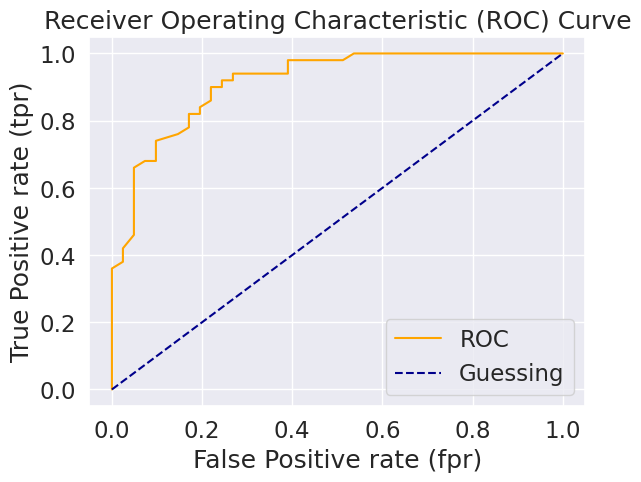

In [349]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # plot ro curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")

    # Costumize the plot
    plt.xlabel("False Positive rate (fpr)")
    plt.ylabel("True Positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [350]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.9148780487804877

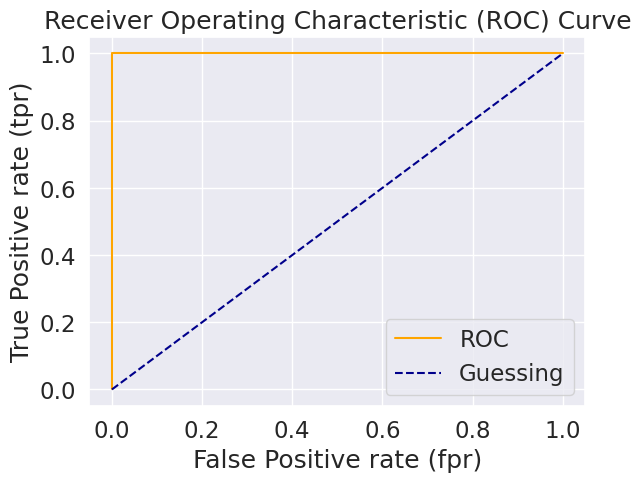

In [351]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [352]:
# perfect AUC score
roc_auc_score(y_test, y_test)

1.0

For more information on these metrics, bookmark the following resources and refer to them when you need:

  * https://www.youtube.com/watch?v=4jRBRDbJemM
  * https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
  * https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

**confusion Matrix**

So the next best way to evaluate a classification model is by using a confusion matrix.

confusion matrix is a quick way to compare the labels a model predicts and the actual label, So the truth labels it was supposed to predict.

In essence, this gives you an idea of where the model is getting confused.

In [353]:
from sklearn.metrics import confusion_matrix

y_preds  = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[33,  8],
       [ 8, 42]])

In [354]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,33,8
1,8,42


In [355]:
33+8+8+42 == len(y_test) == len(y_preds)

True

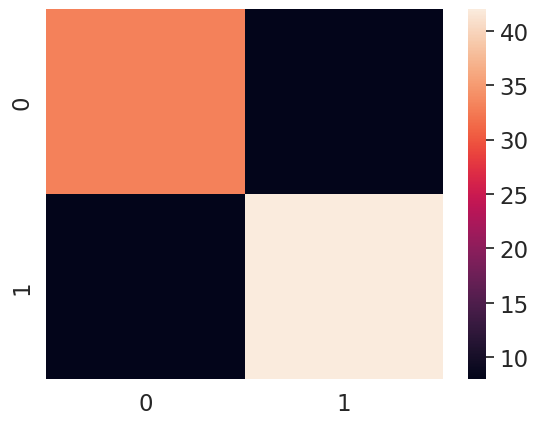

In [356]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# plot it using Seaborn
sns.heatmap(conf_mat);

### creating a confusion matrix using Scikit-Learn

To use the new methods of creating a confusion matrix with Scikit-Learn you need sklearn 1.0+

In [357]:
import sklearn
sklearn.__version__

'1.5.2'

In [358]:
clf

RandomForestClassifier()

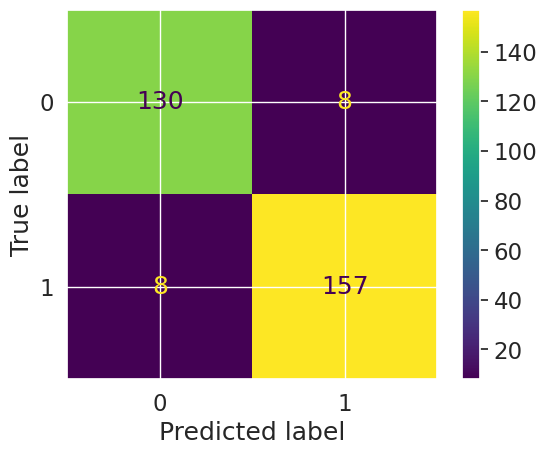

In [359]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, x, y)

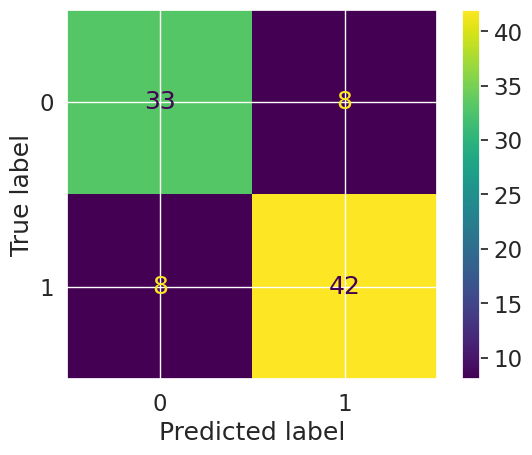

In [360]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

**Classification Report**

In [361]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



In [362]:
# where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

/home/ksohail/miniconda3/envs/T1Env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ksohail/miniconda3/envs/T1Env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ksohail/miniconda3/envs/T1Env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


to summarize classification metrics:

* `Accuracy` is a good measure to start with if all classes are balanced (e.g same amount of samp)
* `Precision` and `recall` become more important when are imbalanced.
* if false positive predictions are worse than false negatives, aim for higher precision.
* if false negative predictions are worse than false positives, aim for higher recall.
* `F1-score` is a combination of precision and recall.

`Classification res`: https://scikit-learn.org/0.16/modules/model_evaluation.html#common-cases-predefined-values

### 4.2.2 Regression model evaluation metrix

`Regression res`: https://scikit-learn.org/0.16/modules/model_evaluation.html#regression-metrics

the ones we're going to cover are:
1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean square error (MSE)

In [363]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop("target", axis=1)
y = housing_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [364]:
model.score(x_test, y_test)

0.8066196804802649

In [365]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [366]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [367]:
y_test.mean()

2.0550030959302323

In [368]:
from sklearn.metrics import r2_score

# FIll an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [369]:
r2_score(y_true=y_test,
         y_pred=y_test_mean)

0.0

In [370]:
r2_score(y_true=y_test,
         y_pred=y_test)

1.0

**Mean absolute error (MAE)**

MAE is the average of the absolute differences between predictions and actual values.

it gives you an idea of how wrong your models predictions are.

In [371]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.3265721842781009

In [372]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})
df["differences"] = df["actual values"] - df["predicted values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,-0.016840
3024,0.45800,0.754940,-0.296940
15663,5.00001,4.928596,0.071414
20484,2.18600,2.540290,-0.354290
9814,2.78000,2.331760,0.448240
13311,1.58700,1.654970,-0.067970
7113,1.98200,2.343230,-0.361230
7668,1.57500,1.661820,-0.086820
18246,3.40000,2.474890,0.925110
5723,4.46600,4.834478,-0.368478


In [373]:
# MAE using formulas and differences
np.abs(df["differences"]).mean()

0.3265721842781009

**Mean square error (MSE)**

MSE is the mean of the square of the errors between predictions and actual values.


In [374]:
# Mean square error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534073069137548

In [375]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,-0.016840,0.000284
3024,0.45800,0.754940,-0.296940,0.088173
15663,5.00001,4.928596,0.071414,0.005100
20484,2.18600,2.540290,-0.354290,0.125521
9814,2.78000,2.331760,0.448240,0.200919


In [376]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

0.2534073069137548

In [377]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16

/tmp/ipykernel_21207/3409892222.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_large_error.iloc[0]["squared_differences"] = 16


In [378]:
df_large_error.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,-0.016840,16.000000
3024,0.45800,0.754940,-0.296940,0.088173
15663,5.00001,4.928596,0.071414,0.005100
20484,2.18600,2.540290,-0.354290,0.125521
9814,2.78000,2.331760,0.448240,0.200919


In [379]:
# Calculate MSE with large error
df_large_error["squared_differences"].mean()

0.25728320720794084

In [380]:
df_large_error.iloc[1:100] = 20
df_large_error

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,-0.016840,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,0.412620,0.170255
16623,2.66800,1.947760,0.720240,0.518746
18086,5.00001,4.836378,0.163632,0.026775
2144,0.72300,0.717820,0.005180,0.000027


In [381]:
# Calculate MSE with more large error
df_large_error["squared_differences"].mean()

0.7333540351264799

### 4.2.3 Finally using the `scoring` parameter

In [433]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [434]:
np.random.seed(42)

# Cross-validation accuracy
cv_acc = cross_val_score(clf, x, y, cv=5, scoring=None)
print(cv_acc), print(cv_acc.mean());

[0.81967213 0.90163934 0.83606557 0.78333333 0.78333333]
0.8248087431693989


In [435]:
# Cross-validation accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [436]:
np.random.seed(42)

cv_acc = cross_val_score(clf, x, y, cv=5, scoring="accuracy")
print(cv_acc), print(cv_acc.mean());

[0.81967213 0.90163934 0.83606557 0.78333333 0.78333333]
0.8248087431693989


In [437]:
# Cross-validation accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [438]:
# Precision
cv_precision = cross_val_score(clf, x, y, cv=5, scoring="precision")
print(cv_precision), print(cv_precision.mean());

[0.76315789 0.90322581 0.83870968 0.79411765 0.74358974]
0.8085601538512754


In [439]:
# Cross-validation precision
print(f"The cross-validated precision is: {np.mean(cv_precision)}")

The cross-validated precision is: 0.8085601538512754


In [440]:
# Recall

np.random.seed(42)
cv_recall = cross_val_score(clf, x, y, cv=5, scoring="recall")
print(cv_recall), print(cv_recall.mean());

[0.84848485 0.87878788 0.84848485 0.81818182 0.87878788]
0.8545454545454545


In [441]:
# Cross-validation recall
print(f"The cross-validated recall is: {np.mean(cv_recall)}")

The cross-validated recall is: 0.8545454545454545


Let's see the `scoring` parameter being using for a regression problem...

In [447]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

H = housing_df[:]

x = H.drop("target", axis=1)
y = H["target"]

model = RandomForestRegressor()

In [448]:
np.random.seed(42)

# Cross-validation accuracy
cv_r2 = cross_val_score(model, x, y, cv=3, scoring=None)
print(cv_r2), print(cv_r2.mean());

[0.62159677 0.72076221 0.62136792]
0.6545756342466266


In [455]:
# Mean absolute error

cv_mae = cross_val_score(model, x, y, cv=5, scoring="neg_mean_absolute_error")
print(cv_mae), print(cv_mae.mean());

[-0.53973786 -0.41040584 -0.44097323 -0.46172466 -0.47583442]
-0.4657352010901164


In [454]:
# Mean squared error

cv_mse = cross_val_score(model, x, y, cv=5, scoring="neg_mean_squared_error")
print(cv_mse), print(cv_mse.mean());

[-0.52599715 -0.3471811  -0.37280217 -0.44625493 -0.46639413]
-0.43172589526216515


## 4.3 Using different evaluation metrics as Scikit-Learn function

The 3rd way to evaluate scikit-learn machine learning model/estmators is to using the `sklearn.metrics` module

In [471]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create x, y
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split data
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2)

# Create model
clf = RandomForestClassifier()

# Fit model
clf.fit(x_train, y_train)

# Make predictions
y_preds = clf.predict(x_test)

# Evaluate model using evaluation function
print("Classifier metrics on the test set")
print(f"Accurracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"precision: {precision_score(y_test, y_preds)}")
print(f"recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accurracy: 85.25%
precision: 0.8484848484848485
recall: 0.875
F1: 0.8615384615384616


In [475]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create x, y
x = housing_df.drop("target", axis=1)
y = housing_df["target"]

# split data
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2)

# Create model
model = RandomForestRegressor()

# Fit model
model.fit(x_train, y_train)

# Make predictions
y_preds = model.predict(x_test)

# Evaluate model using evaluation function
print("Regressor metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regressor metrics on the test set
R2 score: 0.8066196804802649
MAE: 0.3265721842781009
MSE: 0.2534073069137548


In [476]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for the pronlems',
 '3. Fit the model/algo and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

In [478]:
what_were_covering[5]

'5. Improve a model'

## 5. Improving a model

First predictions = baseline predictions.
First model = baseline model.

From a data prespective:
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?

From a model prespective:
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vc Parameters:

* Parameters = model find these pattern in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three wa to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

### 5.1 Tuning hyperparameter by hand
Let's make 3 sets, training, validation and test

In [482]:
patternfrom sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [506]:
def evaluation_preds(y_true, y_preds):
    """
    Preforms evaluation comparison on y_true labels vs. y_pred labels
    on a classification
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"precision: {precision}")
    print(f"recall: {recall}")
    print(f"f1: {f1}")

    return metric_dict

In [507]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_sh = heart_disease.sample(frac=1)

# Create x, y
x = heart_disease_sh.drop("target", axis=1)
y = heart_disease_sh["target"]

# split data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_sh)) # 70% of data
valid_split = round(train_split + 0.15 + len(heart_disease_sh)) # 15% of data

x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]
x_test , y_test  = x[valid_split:], y[valid_split:]

# len(x_train), len(x_valid), len(x_test)

clf_1 = RandomForestClassifier()
clf_1.fit(x_train, y_train)

# Make baseline predictions
y_preds_1 = clf_1.predict(x_valid)

# Evaluate the classifier on validation set
baseline_metrics_1 = evaluation_preds(y_valid, y_preds_1)
baseline_metrics_1

Acc: 81.32%
precision: 0.8235294117647058
recall: 0.84
f1: 0.8316831683168316


{'accuracy': 0.81, 'precision': 0.82, 'recall': 0.84, 'f1': 0.83}

In [516]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=200)
clf_2.fit(x_train, y_train)

# Make baseline predictions
y_preds_2 = clf_2.predict(x_valid)

# Evaluate the classifier on validation set
baseline_metrics_2 = evaluation_preds(y_valid, y_preds_2)
baseline_metrics_2

Acc: 83.52%
precision: 0.8301886792452831
recall: 0.88
f1: 0.8543689320388349


{'accuracy': 0.84, 'precision': 0.83, 'recall': 0.88, 'f1': 0.85}

In [517]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_3 = RandomForestClassifier(n_estimators=100,
                               max_depth=10)
clf_3.fit(x_train, y_train)

# Make baseline predictions
y_preds_3 = clf_3.predict(x_valid)

# Evaluate the classifier on validation set
baseline_metrics_3 = evaluation_preds(y_valid, y_preds_3)
baseline_metrics_3

Acc: 82.42%
precision: 0.84
recall: 0.84
f1: 0.84


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

In [ ]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=200)
clf_2.fit(x_train, y_train)

# Make baseline predictions
y_preds_2 = clf_2.predict(x_valid)

# Evaluate the classifier on validation set
baseline_metrics_2 = evaluation_preds(y_valid, y_preds_2)
baseline_metrics_2